# **NLP**

## **Name:Priyajot Gill**
## **Roll no.:102003293**



# **Getting the data**

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle


In [2]:

# Scrapes transcript data from scrapsfromtheloft.com
data = {}

urls = ['https://scrapsfromtheloft.com/tv-series/money-heist-s05e01-end-of-the-road-transcript/',  
        'https://scrapsfromtheloft.com/tv-series/money-heist-s05e02-do-you-believe-in-reincarnation-transcript/',
        'https://scrapsfromtheloft.com/tv-series/money-heist-s05e03-spectacle-of-life-transcript/', 
        'https://scrapsfromtheloft.com/tv-series/money-heist-s05e04-your-place-in-heaven-transcript/',
       'https://scrapsfromtheloft.com/tv-series/money-heist-s05e06-escape-valve-transcript/',
       'https://scrapsfromtheloft.com/tv-series/money-heist-s05e07-wishful-thinking-transcript/',
       'https://scrapsfromtheloft.com/tv-series/money-heist-s05e08-theory-of-elegance-transcript/',
       'https://scrapsfromtheloft.com/tv-series/money-heist-s05e09-pillow-talk-transcript/',
       'https://scrapsfromtheloft.com/tv-series/money-heist-s05e10-a-family-tradition-transcript/']     

episode = ['E01','E02','E03','E04','E06','E07','E08','E09','E10']

for url, c in zip(urls, episode):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    text = soup.get_text()
    data[c] = text


In [3]:
data.keys()

dict_keys(['E01', 'E02', 'E03', 'E04', 'E06', 'E07', 'E08', 'E09', 'E10'])

# **Data Cleaning**

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.

In [5]:
#retrieves the first item from an iterable object
next(iter(data.keys()))

'E01'

In [7]:
# We are going to change this to key: episode, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(list_of_text)
    return combined_text

In [8]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}


{'E01': ['\n\n\n\n\n\n\n\nMoney Heist - S05E01 - The End of the Road [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\nPAULINE KAEL\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n Menu\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\nPAULINE KAEL\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n\n\n\n\n\n\n Search\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE

In [9]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
E01,\n\n\n\n\n\n\n\nMoney Heist - S05E01 - The End of the Road [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
E02,\n\n\n\n\n\n\n\nMoney Heist - S05E02 - Do You Believe in Reincarnation? [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E03,\n\n\n\n\n\n\n\nMoney Heist - S05E03 - The Spectacle of Life [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
E04,\n\n\n\n\n\n\n\nMoney Heist - S05E04 - Your Place in Heaven [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E06,\n\n\n\n\n\n\n\nMoney Heist - S05E06 - Escape Valve [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E07,\n\n\n\n\n\n\n\nMoney Heist - S05E07 - Wishful Thinking [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E08,\n\n\n\n\n\n\n\nMoney Heist - S05E08 - The Theory of Elegance [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E09,\n\n\n\n\n\n\n\nMoney Heist - S05E09 - Pillow Talk [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
E10,\n\n\n\n\n\n\n\nMoney Heist - S05E10 - A Family Tradition [Transcript] - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...


## **Data cleaning**

In [10]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [11]:
import pandas as pd
data_df = pd.DataFrame(data_df.transcript.apply(round1))
data_df

,transcript
E01,\n\n\n\n\n\n\n\nmoney heist the end of the road scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E02,\n\n\n\n\n\n\n\nmoney heist do you believe in reincarnation scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E03,\n\n\n\n\n\n\n\nmoney heist the spectacle of life scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E04,\n\n\n\n\n\n\n\nmoney heist your place in heaven scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
E06,\n\n\n\n\n\n\n\nmoney heist escape valve scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
E07,\n\n\n\n\n\n\n\nmoney heist wishful thinking scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
E08,\n\n\n\n\n\n\n\nmoney heist the theory of elegance scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
E09,\n\n\n\n\n\n\n\nmoney heist pillow talk scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
E10,\n\n\n\n\n\n\n\nmoney heist a family tradition scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


In [12]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\t', '', text)
    text = re.sub(r'\r', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [13]:
# Let's take a look at the updated text
data_df = pd.DataFrame(data_df.transcript.apply(round2))
data_df

,transcript
E01,money heist the end of the road scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv series...
E02,money heist do you believe in reincarnation scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline k...
E03,money heist the spectacle of life scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seri...
E04,money heist your place in heaven scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv serie...
E06,money heist escape valve scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show...
E07,money heist wishful thinking scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv ...
E08,money heist the theory of elegance scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv ser...
E09,money heist pillow talk scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show ...
E10,money heist a family tradition scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriest...


In [14]:
#Adding their full names
Episode_names = ['The end of the road','Do you believe in reincarnation?','The spectacle of life','Your plaace in heaven','Escape valve','Wishful thinking','The theory of elegance','Pillow talk','A family tradition']

data_df['Episode Name'] = Episode_names
data_df

,transcript,Episode Name
E01,money heist the end of the road scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv series...,The end of the road
E02,money heist do you believe in reincarnation scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline k...,Do you believe in reincarnation?
E03,money heist the spectacle of life scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seri...,The spectacle of life
E04,money heist your place in heaven scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv serie...,Your plaace in heaven
E06,money heist escape valve scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show...,Escape valve
E07,money heist wishful thinking scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv ...,Wishful thinking
E08,money heist the theory of elegance scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv ser...,The theory of elegance
E09,money heist pillow talk scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show ...,Pillow talk
E10,money heist a family tradition scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriest...,A family tradition


In [15]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

# **Document term matrix**


For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [16]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_df.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_df.index
data_dtm

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandons,able,abominationi,abort,aborted,aboutabout,aboutit,aboutits,...,zerookay,zone,zoom,álex,álvaro,ángel,ángelget,ángeli,ángelokaypasaia,úrsula
E01,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
E02,1,1,0,2,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
E03,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,1
E04,0,0,1,2,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
E06,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E07,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
E08,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
E09,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
E10,0,1,0,6,0,0,0,1,0,0,...,1,0,1,0,0,4,1,0,1,0


In [17]:
data_dtm.loc[:, ['fuck']] #total number of occurences of word fuck

,fuck
E01,4
E02,13
E03,2
E04,4
E06,8
E07,2
E08,7
E09,3
E10,8


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english',lowercase=False)
data_cv = cv.fit_transform(data_df.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_df.index
data_dtm

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandons,able,abominationi,abort,aborted,aboutabout,aboutit,aboutits,...,zerookay,zone,zoom,álex,álvaro,ángel,ángelget,ángeli,ángelokaypasaia,úrsula
E01,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
E02,1,1,0,2,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
E03,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,1
E04,0,0,1,2,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
E06,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E07,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
E08,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
E09,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
E10,0,1,0,6,0,0,0,1,0,0,...,1,0,1,0,0,4,1,0,1,0


In [19]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [20]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_df.to_pickle('data_df.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# **Exploratory data analysis**

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

In [21]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()   #ranspose the dimensions of a multi-dimensional array
data.head()   #display first 5 rows of the dataframe

,E01,E02,E03,E04,E06,E07,E08,E09,E10
abandon,0,1,0,0,0,0,0,0,0
abandoned,0,1,0,0,0,0,0,1,1
abandons,0,0,0,1,0,0,0,0,0
able,1,2,0,2,0,0,1,0,6
abominationi,0,0,0,0,0,0,1,0,0


In [22]:
# Find the top 30 words written by each author
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)  #extract top 30 values in descending order
    top_dict[c]= list(zip(top.index, top.values))   #adds the created list of tuples to the dictionary

top_dict

{'E01': [('youre', 20),
  ('dont', 19),
  ('come', 18),
  ('im', 18),
  ('gonna', 15),
  ('plan', 15),
  ('like', 14),
  ('just', 14),
  ('really', 14),
  ('cookies', 14),
  ('going', 13),
  ('think', 12),
  ('fucking', 12),
  ('ill', 11),
  ('want', 10),
  ('love', 10),
  ('know', 10),
  ('time', 9),
  ('sorry', 9),
  ('professor', 9),
  ('make', 9),
  ('website', 8),
  ('moment', 8),
  ('bank', 8),
  ('need', 8),
  ('life', 8),
  ('did', 8),
  ('youll', 8),
  ('gold', 7),
  ('hes', 7)],
 'E02': [('dont', 28),
  ('im', 26),
  ('know', 23),
  ('gonna', 23),
  ('come', 21),
  ('like', 19),
  ('fucking', 17),
  ('going', 15),
  ('need', 15),
  ('cookies', 14),
  ('lets', 14),
  ('fuck', 13),
  ('youre', 12),
  ('theyre', 11),
  ('got', 10),
  ('didnt', 9),
  ('care', 9),
  ('hostages', 9),
  ('just', 8),
  ('website', 8),
  ('want', 8),
  ('shit', 7),
  ('let', 7),
  ('make', 7),
  ('right', 7),
  ('heist', 7),
  ('doing', 7),
  ('tell', 7),
  ('hold', 7),
  ('ill', 7)],
 'E03': [('dont'

In [23]:
# Print the top 15 words used in each episode
for author, top_words in top_dict.items():
    print(episode)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

['E01', 'E02', 'E03', 'E04', 'E06', 'E07', 'E08', 'E09', 'E10']
youre, dont, come, im, gonna, plan, like, just, really, cookies, going, think, fucking, ill
---
['E01', 'E02', 'E03', 'E04', 'E06', 'E07', 'E08', 'E09', 'E10']
dont, im, know, gonna, come, like, fucking, going, need, cookies, lets, fuck, youre, theyre
---
['E01', 'E02', 'E03', 'E04', 'E06', 'E07', 'E08', 'E09', 'E10']
dont, just, know, need, gonna, come, like, cookies, im, going, fucking, wont, life, lets
---
['E01', 'E02', 'E03', 'E04', 'E06', 'E07', 'E08', 'E09', 'E10']
dont, im, need, know, got, think, gonna, come, cookies, theyre, going, look, helsinki, just
---
['E01', 'E02', 'E03', 'E04', 'E06', 'E07', 'E08', 'E09', 'E10']
dont, like, fucking, just, gonna, leaving, cookies, know, want, youre, right, open, use, think
---
['E01', 'E02', 'E03', 'E04', 'E06', 'E07', 'E08', 'E09', 'E10']
come, gold, im, baby, dont, just, going, cookies, gonna, lets, like, little, know, open
---
['E01', 'E02', 'E03', 'E04', 'E06', 'E07', '

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [24]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter      #Counter counts the number of occurrences of elements in any iterable object.

# Let's first pull out the top 30 words for each episode
words = []
for episode in data.columns:
    top = [word for (word, count) in top_dict[episode]]
    for t in top:
        words.append(t)
        
words

['youre',
 'dont',
 'come',
 'im',
 'gonna',
 'plan',
 'like',
 'just',
 'really',
 'cookies',
 'going',
 'think',
 'fucking',
 'ill',
 'want',
 'love',
 'know',
 'time',
 'sorry',
 'professor',
 'make',
 'website',
 'moment',
 'bank',
 'need',
 'life',
 'did',
 'youll',
 'gold',
 'hes',
 'dont',
 'im',
 'know',
 'gonna',
 'come',
 'like',
 'fucking',
 'going',
 'need',
 'cookies',
 'lets',
 'fuck',
 'youre',
 'theyre',
 'got',
 'didnt',
 'care',
 'hostages',
 'just',
 'website',
 'want',
 'shit',
 'let',
 'make',
 'right',
 'heist',
 'doing',
 'tell',
 'hold',
 'ill',
 'dont',
 'just',
 'know',
 'need',
 'gonna',
 'come',
 'like',
 'cookies',
 'im',
 'going',
 'fucking',
 'wont',
 'life',
 'lets',
 'right',
 'got',
 'people',
 'theyre',
 'youre',
 'thats',
 'think',
 'good',
 'website',
 'want',
 'dad',
 'say',
 'did',
 'theyll',
 'stop',
 'professor',
 'dont',
 'im',
 'need',
 'know',
 'got',
 'think',
 'gonna',
 'come',
 'cookies',
 'theyre',
 'going',
 'look',
 'helsinki',
 'just',

In [25]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('youre', 9),
 ('dont', 9),
 ('im', 9),
 ('like', 9),
 ('just', 9),
 ('cookies', 9),
 ('fucking', 9),
 ('know', 9),
 ('going', 8),
 ('website', 8),
 ('right', 8),
 ('come', 7),
 ('gonna', 7),
 ('think', 7),
 ('want', 7),
 ('need', 7),
 ('got', 7),
 ('time', 6),
 ('thats', 6),
 ('professor', 5),
 ('did', 5),
 ('gold', 5),
 ('lets', 5),
 ('theyre', 5),
 ('heist', 5),
 ('life', 4),
 ('ill', 3),
 ('love', 3),
 ('make', 3),
 ('bank', 3),
 ('fuck', 3),
 ('tell', 3),
 ('use', 3),
 ('plan', 2),
 ('didnt', 2),
 ('care', 2),
 ('let', 2),
 ('wont', 2),
 ('good', 2),
 ('say', 2),
 ('door', 2),
 ('leave', 2),
 ('way', 2),
 ('open', 2),
 ('little', 2),
 ('baby', 2),
 ('police', 2),
 ('really', 1),
 ('sorry', 1),
 ('moment', 1),
 ('youll', 1),
 ('hes', 1),
 ('hostages', 1),
 ('shit', 1),
 ('doing', 1),
 ('hold', 1),
 ('people', 1),
 ('dad', 1),
 ('theyll', 1),
 ('stop', 1),
 ('look', 1),
 ('helsinki', 1),
 ('shoot', 1),
 ('music', 1),
 ('worry', 1),
 ('hey', 1),
 ('leaving', 1),
 ('man', 1),
 ('leav

In [26]:
# If more than half of the episode have it as a top word, exclude it from the list i.e. everyone is using it hence not unique
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words

['youre',
 'dont',
 'im',
 'like',
 'just',
 'cookies',
 'fucking',
 'know',
 'going',
 'website',
 'right',
 'come',
 'gonna',
 'think',
 'want',
 'need',
 'got',
 'time',
 'thats',
 'professor',
 'did',
 'gold',
 'lets',
 'theyre',
 'heist']

In [27]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer   #create a vocabulary of known words and encode the documents in a numeric format

# Read in cleaned data
data_df = pd.read_pickle('data_df.pkl')

# Add new stop words
#union of stop words is to combine the standard stop words with any additional stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_df.transcript)        #CountVectorizer method is used to convert the text data into a matrix of word counts.
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_df.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))  #It serializes an object hierarchy and writes the pickled representation to a file-like object.
data_stop.to_pickle("dtm_stop.pkl")

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## **Word clouds**

In [28]:
# Let's make some word clouds!
# Terminal 
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="black", colormap="Pastel2",
               max_font_size=150, random_state=42)   
#setting "random_state" to the same value will result in the same wordcloud image being generated each time
#else it will result in different wordcloud images being generated each time.

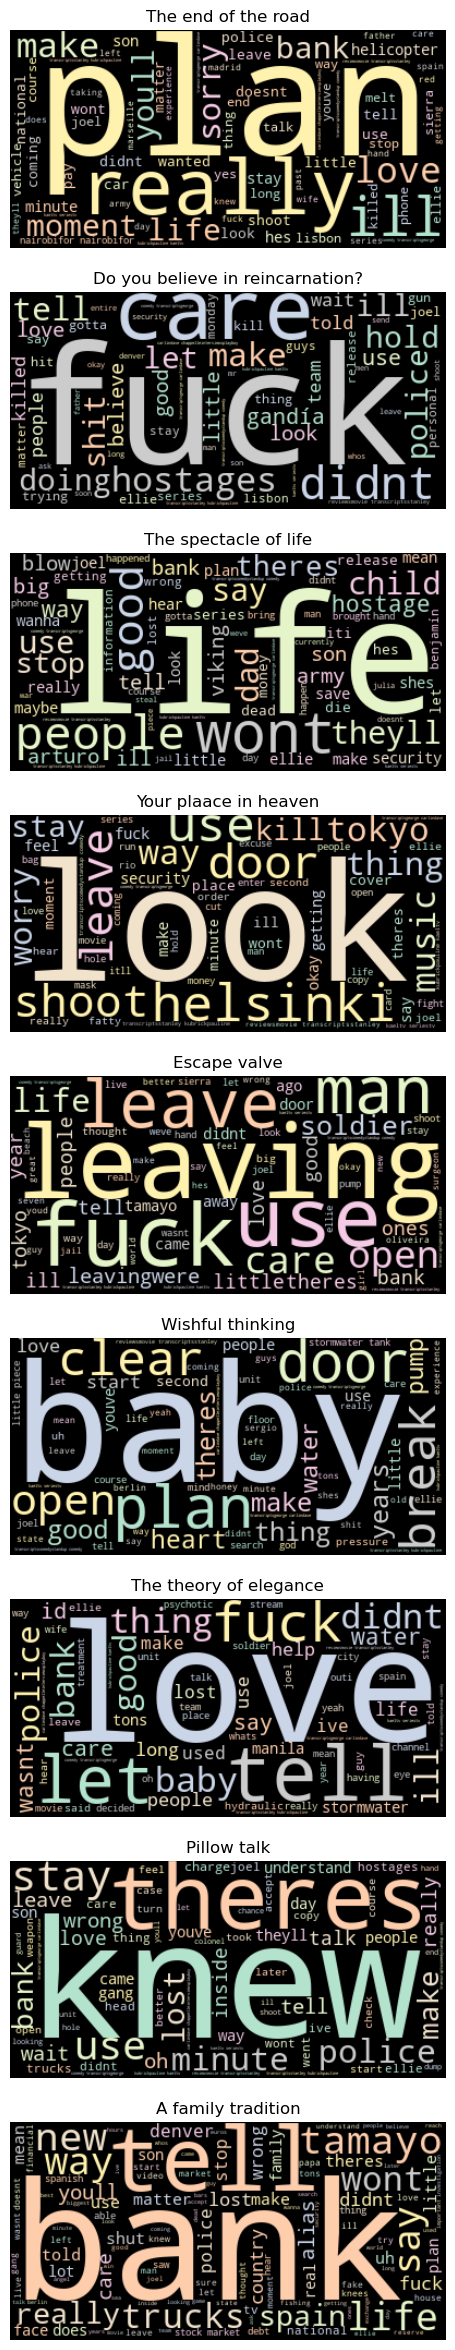

In [29]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [50, 30]  #"rcParams" is a dictionary in the matplotlib library that contains default settings for various aspects of the library, such as figure size, line width, font size, and others.
Episode_names = ['The end of the road','Do you believe in reincarnation?','The spectacle of life','Your plaace in heaven','Escape valve','Wishful thinking','The theory of elegance','Pillow talk','A family tradition']


# Create subplots for each episode
for index, episode in enumerate(data.columns):
    wc.generate(data_df.transcript[episode])
    
    plt.subplot(9, 1, index+1)  #arranged in a grid with 9 rows and 1 column. The position of each subplot is determined by the "index+1" argument.
    plt.imshow(wc, interpolation="bilinear")  
    #Interpolation is the process of estimating the values of pixels in an image based on the values of surrounding pixels.
    #bilinear interpolation and calculates the weighted average of surrounding pixels to estimate the value of a pixel
    #nearest,bilinear,bicubic(smoothest)
    
    plt.axis("off")     #removes the axis labels, tick marks, and the background of the axis from the plot, leaving only the image or data points.
    plt.title(Episode_names[index])
    
plt.show()

## **Number of words**

In [30]:
# Find the number of unique words that each episode uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for episode in data.columns:
    uniques = data[episode].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(Episode_names, unique_list)), columns=['Episode', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,Episode,unique_words
6,The theory of elegance,1249
7,Pillow talk,1268
3,Your plaace in heaven,1287
5,Wishful thinking,1353
4,Escape valve,1435
1,Do you believe in reincarnation?,1477
0,The end of the road,1512
2,The spectacle of life,1574
8,A family tradition,1981


In [31]:
# Calculate the words per minute of each episode

# Find the total number of words that an episode uses
total_list = []
for episode in data.columns:
    totals = sum(data[episode])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 90]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,Episode,unique_words,total_words,run_times,words_per_minute
6,The theory of elegance,1249,2008,77,26.077922
2,The spectacle of life,1574,2419,80,30.237500
5,Wishful thinking,1353,2229,73,30.534247
7,Pillow talk,1268,2085,63,33.095238
3,Your plaace in heaven,1287,2007,60,33.450000
4,Escape valve,1435,2277,67,33.985075
8,A family tradition,1981,3308,90,36.755556
1,Do you believe in reincarnation?,1477,2283,59,38.694915
0,The end of the road,1512,2341,60,39.016667


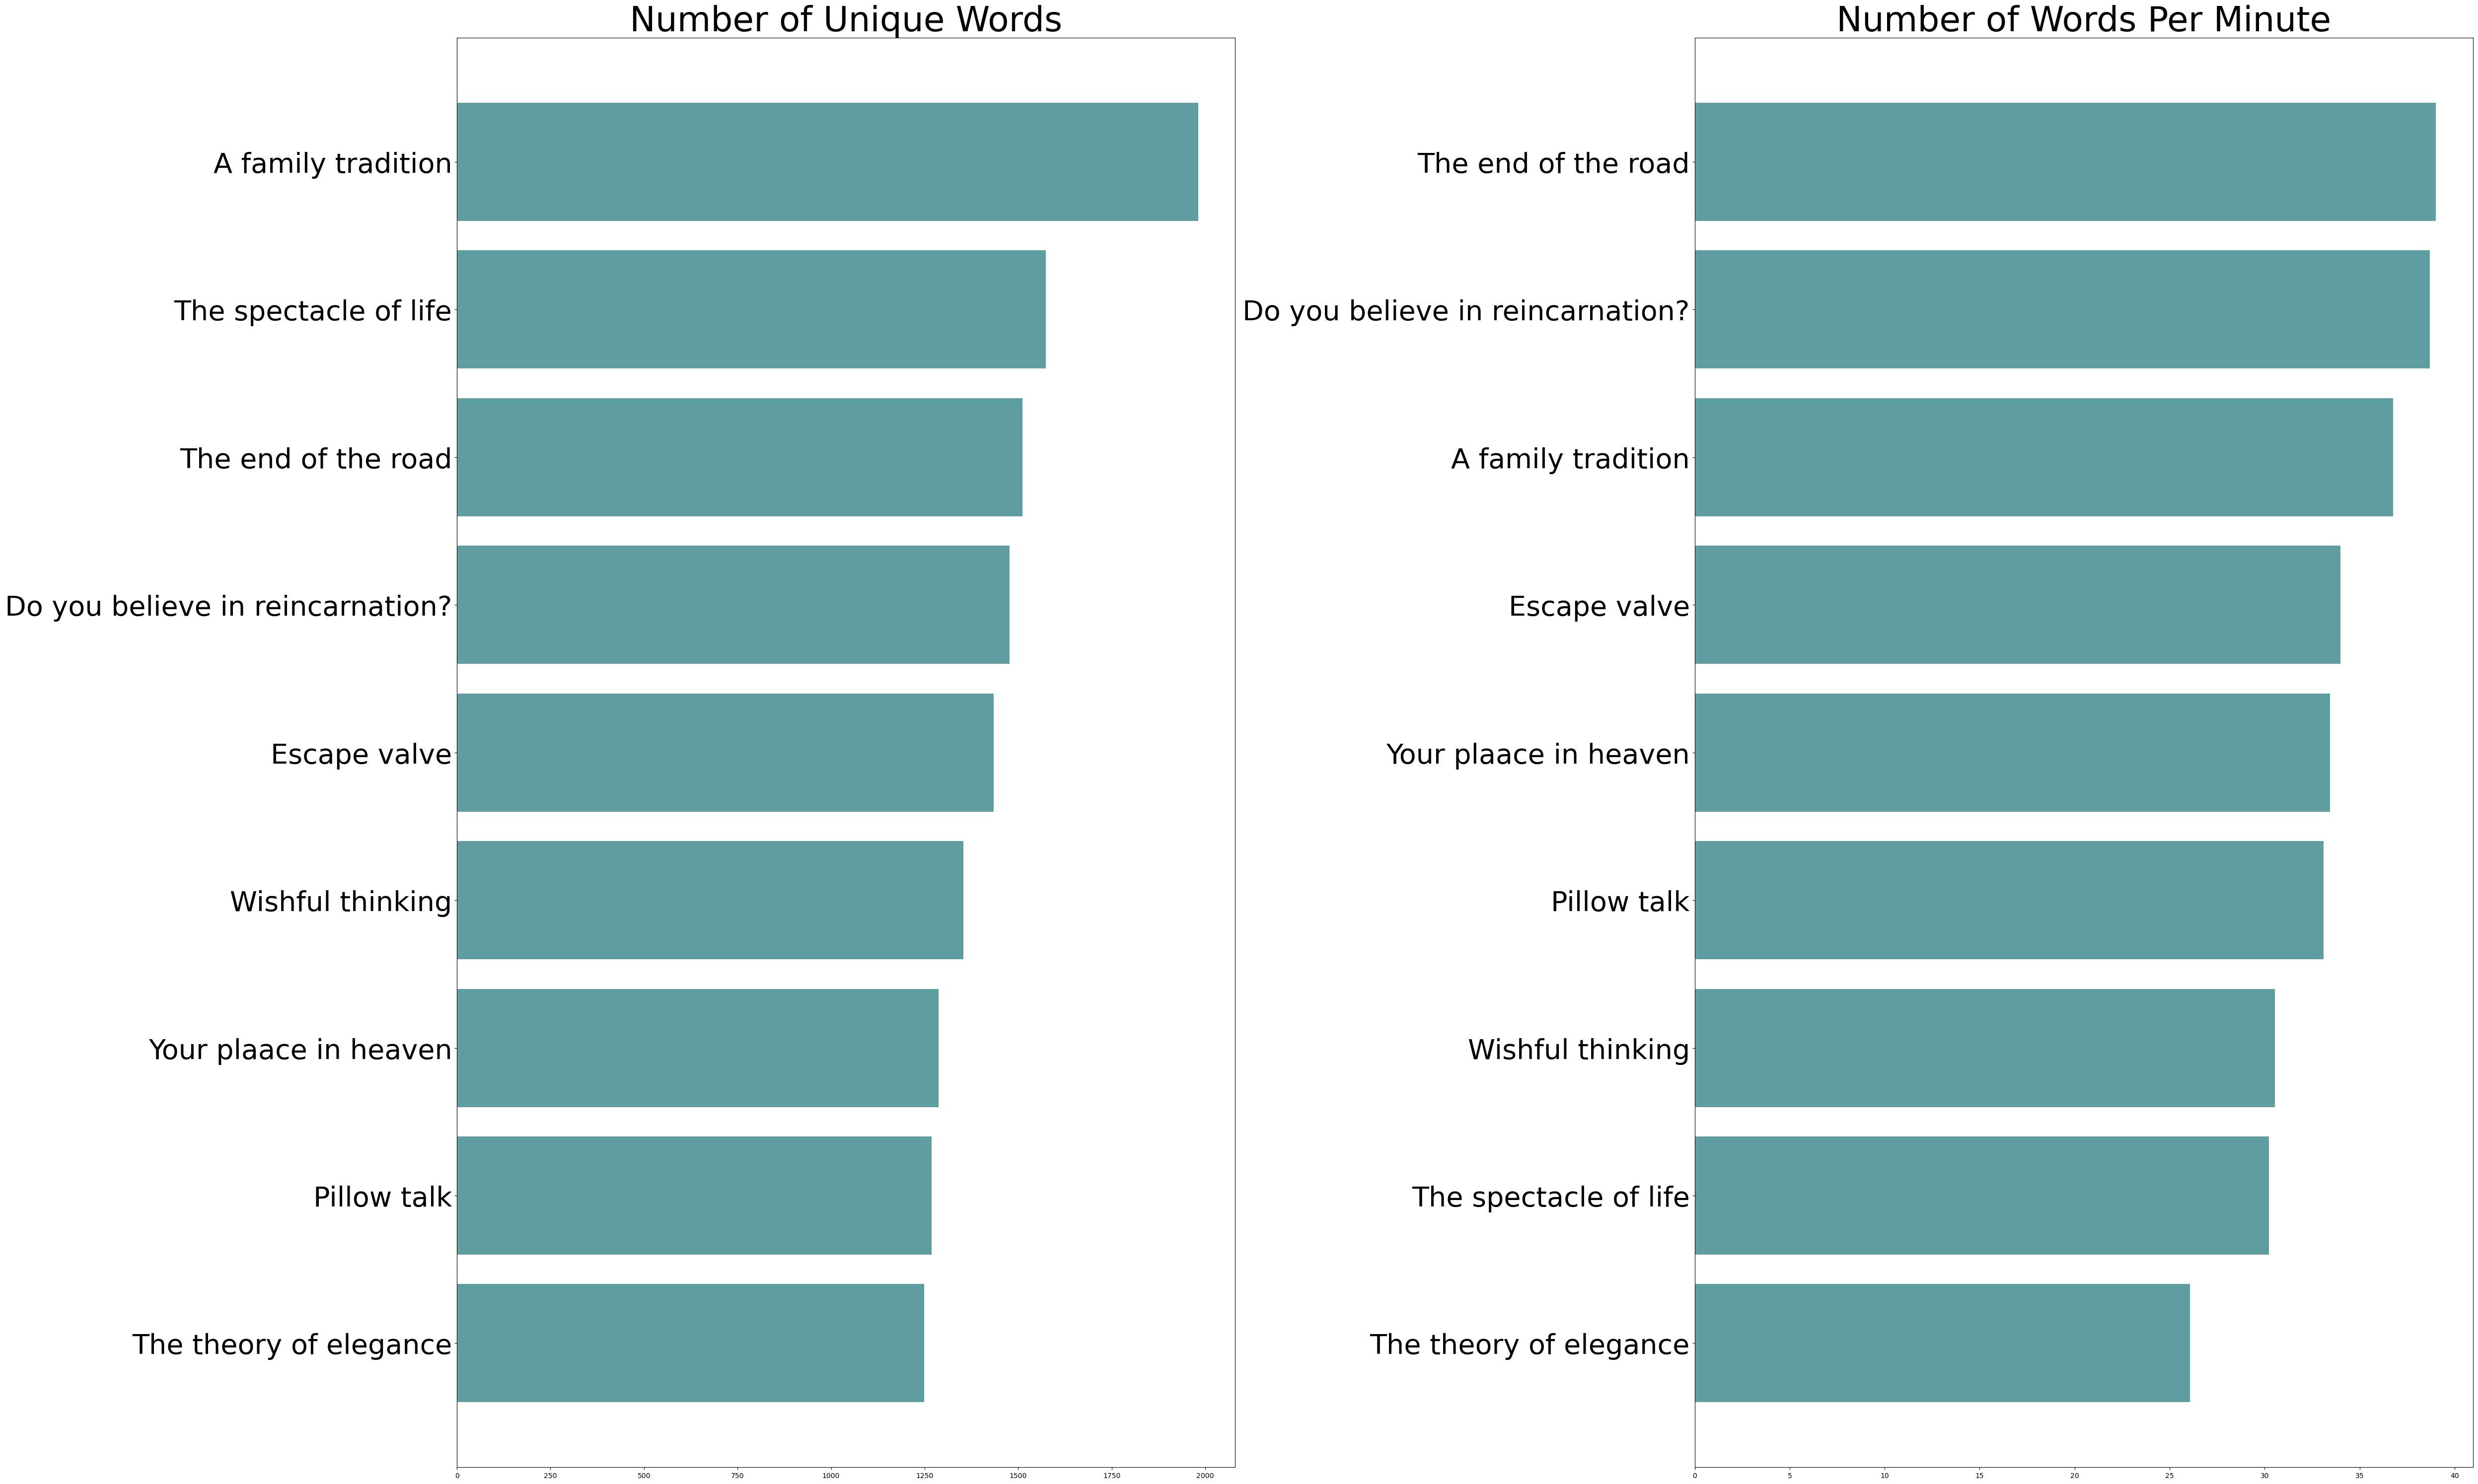

In [32]:
# Let's plot our findings
import numpy as np

#array will have "len(data_words)" number of evenly spaced elements, with each element representing a y-coordinate for a bar in a bar plot

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center',color='cadetblue')  #horizontal bar plot
plt.yticks(y_pos, data_unique_sort.Episode,fontsize=40)
plt.title('Number of Unique Words', fontsize=50)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center',color='cadetblue')
plt.yticks(y_pos, data_wpm_sort.Episode,fontsize=40)
plt.title('Number of Words Per Minute', fontsize=50)

plt.tight_layout()
plt.show()

## **Amount of profanity**

In [33]:
#Let's take a look at the most common words again.
Counter(words).most_common()

[('youre', 9),
 ('dont', 9),
 ('im', 9),
 ('like', 9),
 ('just', 9),
 ('cookies', 9),
 ('fucking', 9),
 ('know', 9),
 ('going', 8),
 ('website', 8),
 ('right', 8),
 ('come', 7),
 ('gonna', 7),
 ('think', 7),
 ('want', 7),
 ('need', 7),
 ('got', 7),
 ('time', 6),
 ('thats', 6),
 ('professor', 5),
 ('did', 5),
 ('gold', 5),
 ('lets', 5),
 ('theyre', 5),
 ('heist', 5),
 ('life', 4),
 ('ill', 3),
 ('love', 3),
 ('make', 3),
 ('bank', 3),
 ('fuck', 3),
 ('tell', 3),
 ('use', 3),
 ('plan', 2),
 ('didnt', 2),
 ('care', 2),
 ('let', 2),
 ('wont', 2),
 ('good', 2),
 ('say', 2),
 ('door', 2),
 ('leave', 2),
 ('way', 2),
 ('open', 2),
 ('little', 2),
 ('baby', 2),
 ('police', 2),
 ('really', 1),
 ('sorry', 1),
 ('moment', 1),
 ('youll', 1),
 ('hes', 1),
 ('hostages', 1),
 ('shit', 1),
 ('doing', 1),
 ('hold', 1),
 ('people', 1),
 ('dad', 1),
 ('theyll', 1),
 ('stop', 1),
 ('look', 1),
 ('helsinki', 1),
 ('shoot', 1),
 ('music', 1),
 ('worry', 1),
 ('hey', 1),
 ('leaving', 1),
 ('man', 1),
 ('leav

In [34]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck','shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck,data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
E01,16,2
E02,30,7
E03,12,3
E04,12,1
E06,27,2
E07,13,4
E08,15,1
E09,10,0
E10,22,1


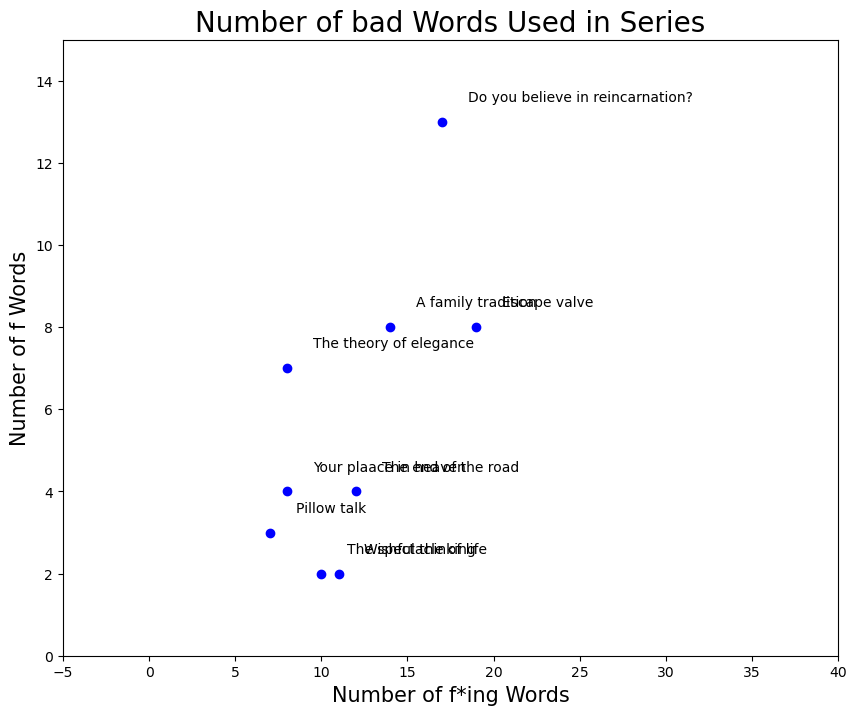

In [35]:
data_reaction_words = data.transpose()[['fucking', 'fuck']]
data_reaction = pd.concat([data_reaction_words.fucking, data_reaction_words.fuck], axis=1)
data_reaction.columns = ['fucking', 'fuck']

plt.rcParams['figure.figsize'] = [10, 8]

for i, episode in enumerate(data_reaction.index):
    x = data_reaction.fucking.loc[episode]
    y = data_reaction.fuck.loc[episode]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, Episode_names[i], fontsize=10)
    plt.xlim(-5, 40) 
    plt.ylim(0,15) 
    
plt.title('Number of bad Words Used in Series', fontsize=20)
plt.xlabel('Number of f*ing Words', fontsize=15)
plt.ylabel('Number of f Words', fontsize=15)

plt.show()

# **Sentiment Analysis**

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## **Sentiment of routine**

In [36]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,Episode Name
E01,money heist the end of the road scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv series...,The end of the road
E02,money heist do you believe in reincarnation scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline k...,Do you believe in reincarnation?
E03,money heist the spectacle of life scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seri...,The spectacle of life
E04,money heist your place in heaven scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv serie...,Your plaace in heaven
E06,money heist escape valve scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show...,Escape valve
E07,money heist wishful thinking scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv ...,Wishful thinking
E08,money heist the theory of elegance scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv ser...,The theory of elegance
E09,money heist pillow talk scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show ...,Pillow talk
E10,money heist a family tradition scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriest...,A family tradition


In [37]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,Episode Name,polarity,subjectivity
E01,money heist the end of the road scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv series...,The end of the road,0.001942,0.525928
E02,money heist do you believe in reincarnation scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline k...,Do you believe in reincarnation?,0.007486,0.514192
E03,money heist the spectacle of life scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seri...,The spectacle of life,0.064886,0.479885
E04,money heist your place in heaven scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv serie...,Your plaace in heaven,0.050341,0.495583
E06,money heist escape valve scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show...,Escape valve,0.025996,0.509664
E07,money heist wishful thinking scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv ...,Wishful thinking,0.078033,0.503183
E08,money heist the theory of elegance scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv ser...,The theory of elegance,0.066640,0.528388
E09,money heist pillow talk scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show ...,Pillow talk,0.051341,0.491467
E10,money heist a family tradition scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriest...,A family tradition,0.065033,0.494261


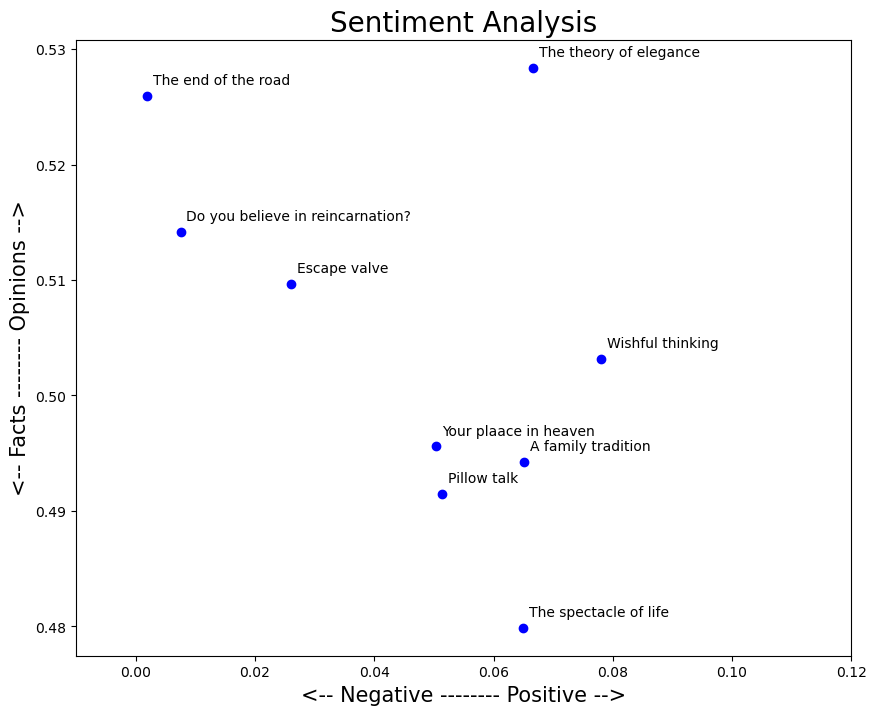

In [38]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, episode in enumerate(data.index):
    x = data.polarity.loc[episode]
    y = data.subjectivity.loc[episode]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['Episode Name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## **Sentiment of routine overtime**

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [39]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [40]:
# Let's take a look at our data again
data

,transcript,Episode Name,polarity,subjectivity
E01,money heist the end of the road scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv series...,The end of the road,0.001942,0.525928
E02,money heist do you believe in reincarnation scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline k...,Do you believe in reincarnation?,0.007486,0.514192
E03,money heist the spectacle of life scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seri...,The spectacle of life,0.064886,0.479885
E04,money heist your place in heaven scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv serie...,Your plaace in heaven,0.050341,0.495583
E06,money heist escape valve scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show...,Escape valve,0.025996,0.509664
E07,money heist wishful thinking scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv ...,Wishful thinking,0.078033,0.503183
E08,money heist the theory of elegance scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv ser...,The theory of elegance,0.066640,0.528388
E09,money heist pillow talk scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show ...,Pillow talk,0.051341,0.491467
E10,money heist a family tradition scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriest...,A family tradition,0.065033,0.494261


In [41]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['money heist    the end of the road   scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  menumoviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  search moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  menumoviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  searchtv series money heist –  – the end of the road  september  the professor faces off with sierra as tamayo raises th

In [42]:
# The list has 10 elements, one for each transcript
len(list_pieces)

9

In [44]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [45]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.059313725490196076,
  0.21720238095238095,
  -0.0031887755102040843,
  -0.10700000000000001,
  0.006660917207792206,
  -0.015637860082304528,
  0.016865079365079368,
  -0.10777777777777776,
  -0.11802910052910054,
  0.027343749999999997],
 [0.09734848484848482,
  0.04147172272172271,
  -0.10977564102564102,
  0.08295940170940169,
  0.04641203703703702,
  -0.07989130434782607,
  -0.03501024065540195,
  -0.004976715203987923,
  0.018148180648180634,
  0.027343749999999997],
 [-0.12166666666666667,
  -0.06641075937950937,
  0.1713464696223317,
  0.11170634920634923,
  0.2189732142857143,
  0.05744897959183672,
  0.06434167684167685,
  0.026266339869281046,
  0.077493564993565,
  0.027343749999999997],
 [0.012936507936507942,
  0.12149470899470899,
  0.0753623188405797,
  0.06545698924731184,
  0.031394557823129256,
  0.16275062656641606,
  -0.010051020408163283,
  0.010825892857142857,
  0.02116638321995465,
  0.040625],
 [-0.12463474025974026,
  0.08026791584483892,
  -0.037689393939

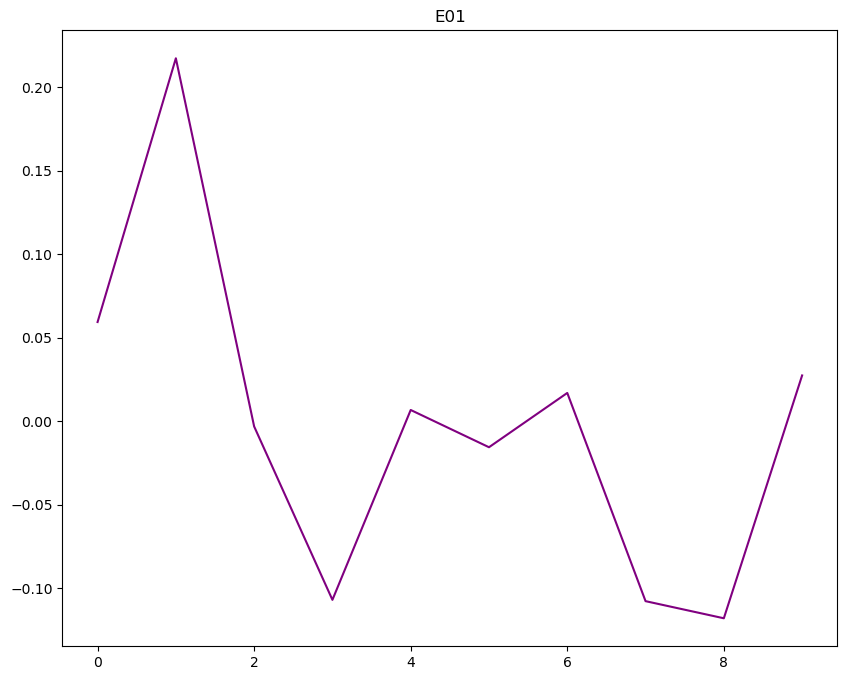

In [46]:
# Show the plot for one episode
plt.plot(polarity_transcript[0],color='purple')
plt.title(data['Episode Name'].index[0])
plt.show()

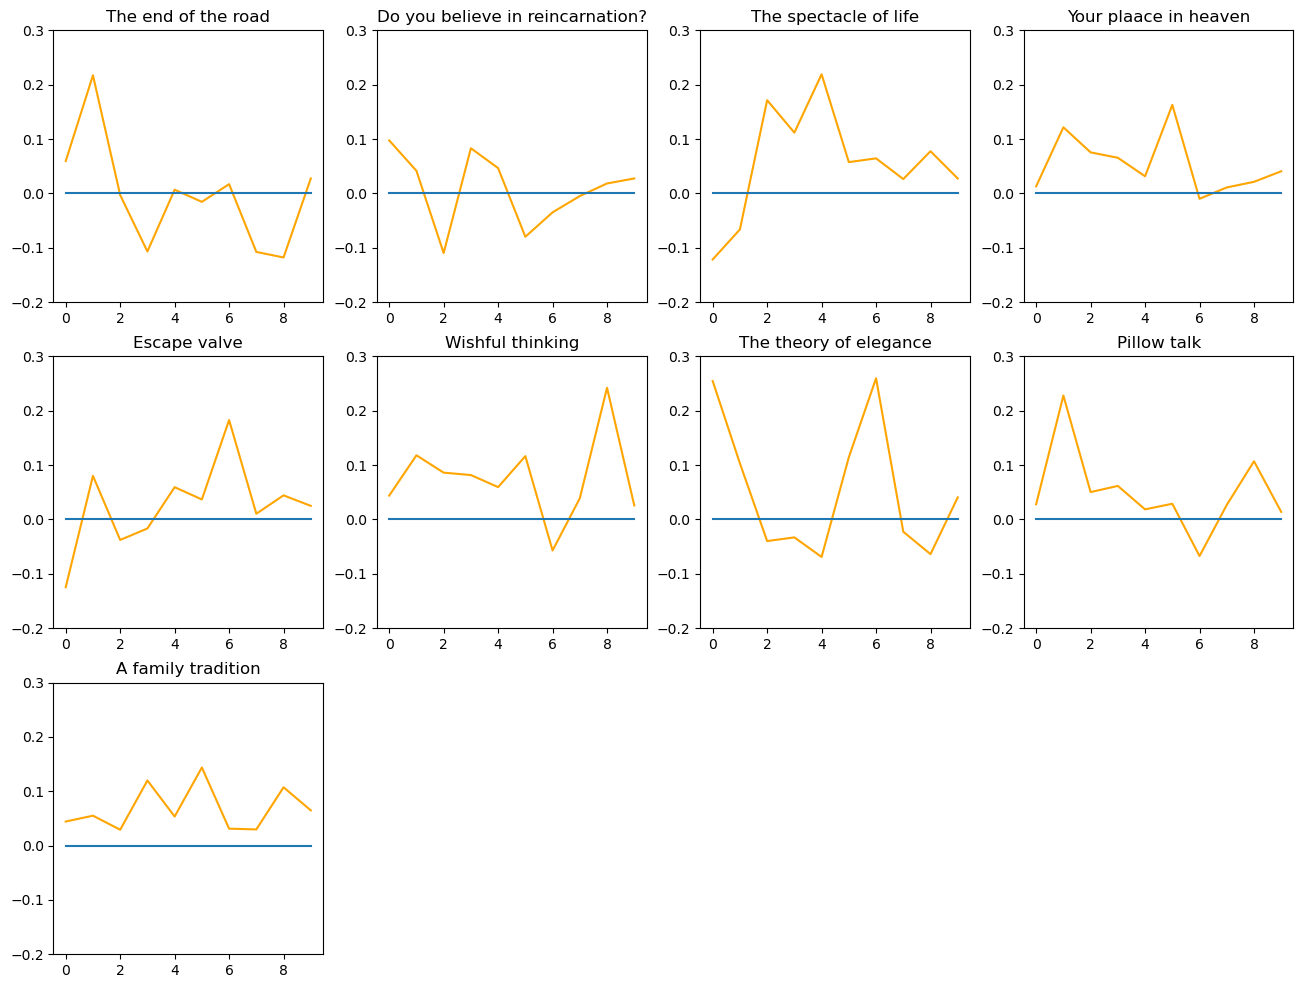

In [47]:
# Show the plot for all episodes
plt.rcParams['figure.figsize'] = [16, 12]

for index, episode in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index],color='orange')
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['Episode Name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

## Topic Modeling - Attempt #1 (All Text)

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

In [48]:
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,abandon,abandoned,abandons,able,abominationi,abort,aborted,aboutabout,aboutit,aboutits,...,zerookay,zone,zoom,álex,álvaro,ángel,ángelget,ángeli,ángelokaypasaia,úrsula
E01,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
E02,1,1,0,2,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
E03,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,1
E04,0,0,1,2,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
E06,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E07,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
E08,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
E09,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
E10,0,1,0,6,0,0,0,1,0,0,...,1,0,1,0,0,4,1,0,1,0


In [49]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

In [50]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,E01,E02,E03,E04,E06,E07,E08,E09,E10
abandon,0,1,0,0,0,0,0,0,0
abandoned,0,1,0,0,0,0,0,1,1
abandons,0,0,0,1,0,0,0,0,0
able,1,2,0,2,0,0,1,0,6
abominationi,0,0,0,0,0,0,1,0,0


In [51]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [52]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
id2word

{4264: 'money',
 1924: 'end',
 5745: 'road',
 5915: 'scraps',
 3820: 'loft',
 6205: 'skip',
 1226: 'content',
 4352: 'moviesmovie',
 5680: 'reviewsmovie',
 7010: 'transcriptsstanley',
 3633: 'kubrickpauline',
 3536: 'kaeltv',
 6017: 'seriestv',
 7008: 'transcriptscomedystandup',
 1142: 'comedy',
 7009: 'transcriptsgeorge',
 877: 'carlindave',
 966: 'chappelleinterviewsplayboy',
 3362: 'interviewsmusichistorybooks',
 4110: 'menumoviesmovie',
 5936: 'search',
 5939: 'searchtv',
 6016: 'series',
 6002: 'september',
 2123: 'faces',
 6150: 'sierra',
 6594: 'tamayo',
 5479: 'raises',
 6385: 'stakes',
 4453: 'negotiations',
 821: 'calling',
 280: 'army',
 4993: 'past',
 555: 'berlin',
 4070: 'meets',
 2154: 'family',
 4096: 'member',
 6341: 'spanish',
 3635: 'la',
 896: 'casa',
 4954: 'papel',
 3143: 'house',
 4955: 'paper',
 1361: 'crime',
 1819: 'drama',
 6652: 'television',
 1357: 'created',
 7764: 'álex',
 5081: 'pina',
 6987: 'traces',
 3831: 'longprepared',
 2879: 'heists',
 3694: 'led'

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [53]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.003*"baby" + 0.003*"love" + 0.002*"tell" + 0.002*"use" + 0.002*"door" + 0.002*"good" + 0.002*"let" + 0.002*"stormwater" + 0.002*"people" + 0.002*"little"'),
 (1,
  '0.003*"bank" + 0.003*"tell" + 0.003*"life" + 0.003*"really" + 0.003*"use" + 0.002*"ill" + 0.002*"make" + 0.002*"fuck" + 0.002*"care" + 0.002*"didnt"')]

In [54]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=50)
lda.print_topics()

[(0,
  '0.004*"love" + 0.003*"baby" + 0.003*"tell" + 0.003*"use" + 0.003*"theres" + 0.003*"open" + 0.003*"people" + 0.002*"let" + 0.002*"good" + 0.002*"care"'),
 (1,
  '0.003*"bank" + 0.003*"fuck" + 0.003*"tell" + 0.003*"say" + 0.002*"make" + 0.002*"way" + 0.002*"care" + 0.002*"use" + 0.002*"look" + 0.002*"life"'),
 (2,
  '0.003*"really" + 0.003*"plan" + 0.003*"life" + 0.002*"wont" + 0.002*"ill" + 0.002*"make" + 0.002*"bank" + 0.002*"people" + 0.002*"love" + 0.002*"sorry"')]

In [55]:
#model a corpus of text documents as a mixture of topics and displays the most significant words in each topic
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=500)
lda.print_topics()

[(0,
  '0.003*"knew" + 0.003*"theres" + 0.003*"stay" + 0.002*"use" + 0.002*"police" + 0.002*"lost" + 0.002*"oh" + 0.002*"wait" + 0.002*"minutes" + 0.002*"wrong"'),
 (1,
  '0.003*"plan" + 0.003*"really" + 0.003*"life" + 0.003*"little" + 0.003*"use" + 0.002*"wont" + 0.002*"make" + 0.002*"people" + 0.002*"ill" + 0.002*"love"'),
 (2,
  '0.004*"tell" + 0.004*"bank" + 0.003*"fuck" + 0.003*"love" + 0.003*"care" + 0.003*"didnt" + 0.003*"life" + 0.002*"say" + 0.002*"let" + 0.002*"ill"')]

In [56]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.003*"use" + 0.003*"little" + 0.003*"life" + 0.003*"ill" + 0.003*"really" + 0.003*"love" + 0.003*"people" + 0.002*"make" + 0.002*"good" + 0.002*"care"'),
 (1,
  '0.000*"use" + 0.000*"life" + 0.000*"tell" + 0.000*"didnt" + 0.000*"transcriptsgeorge" + 0.000*"people" + 0.000*"fuck" + 0.000*"way" + 0.000*"ill" + 0.000*"bank"'),
 (2,
  '0.005*"love" + 0.004*"tell" + 0.003*"baby" + 0.003*"let" + 0.002*"stormwater" + 0.002*"didnt" + 0.002*"oh" + 0.002*"ill" + 0.002*"bank" + 0.002*"police"'),
 (3,
  '0.005*"bank" + 0.003*"tell" + 0.003*"theres" + 0.003*"way" + 0.003*"knew" + 0.002*"use" + 0.002*"really" + 0.002*"life" + 0.002*"wont" + 0.002*"lost"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [57]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'         #pos_tag() function is used to tag each word with its part-of-speech (POS) tag.
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [58]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_df.pkl')
data_clean

,transcript,Episode Name
E01,money heist the end of the road scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv series...,The end of the road
E02,money heist do you believe in reincarnation scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline k...,Do you believe in reincarnation?
E03,money heist the spectacle of life scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seri...,The spectacle of life
E04,money heist your place in heaven scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv serie...,Your plaace in heaven
E06,money heist escape valve scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show...,Escape valve
E07,money heist wishful thinking scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv ...,Wishful thinking
E08,money heist the theory of elegance scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv ser...,The theory of elegance
E09,money heist pillow talk scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show ...,Pillow talk
E10,money heist a family tradition scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriest...,A family tradition


In [59]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
E01,money end road scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmovie kubrickpau...
E02,money heist reincarnation scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmovie...
E03,money heist spectacle life scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmovi...
E04,money place scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmovie kubrickpaulin...
E06,money heist escape scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmovie kubric...
E07,money heist scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmovie kubrickpaulin...
E08,money theory elegance scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmovie kub...
E09,money heist talk scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmovie kubrickp...
E10,money heist family tradition scraps skip reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show comedy transcriptsgeorge menumoviesmo...


In [60]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abominationi,aboutits,absolute,absurdtheres,accept,access,accomplishment,ace,act,actions,...,youyeah,youyeahand,youyou,youyoure,youyouve,yupemil,zerookay,zone,álvaro,ángel
E01,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
E02,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
E03,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
E04,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
E06,0,0,0,0,1,0,0,0,1,0,...,1,0,1,1,0,1,0,0,0,0
E07,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E08,1,1,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
E09,0,0,0,0,1,1,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
E10,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,4


In [62]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))
# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())
id2wordn

{2429: 'money',
 1064: 'end',
 3251: 'road',
 3338: 'scraps',
 3495: 'skip',
 3208: 'reviewsmovie',
 3959: 'transcriptsstanley',
 2045: 'kubrickpauline',
 1994: 'kaeltv',
 3389: 'seriestv',
 655: 'comedy',
 3958: 'transcriptsgeorge',
 2316: 'menumoviesmovie',
 1893: 'interviewsmusichistorybooks',
 3388: 'series',
 1585: 'heist',
 3021: 'professor',
 3463: 'sierra',
 3709: 'tamayo',
 3591: 'stakes',
 2540: 'negotiations',
 106: 'army',
 267: 'berlin',
 2291: 'meets',
 1174: 'family',
 2305: 'member',
 2047: 'la',
 497: 'casa',
 1767: 'house',
 2779: 'paper',
 795: 'crime',
 1014: 'drama',
 3746: 'television',
 1592: 'heists',
 4345: 'álvaro',
 2369: 'mint',
 3551: 'spain',
 191: 'bank',
 2840: 'perspective',
 3257: 'robbers',
 2526: 'narrative',
 1184: 'fashion',
 3164: 'relies',
 1255: 'flashbacks',
 3884: 'timejumps',
 540: 'character',
 2472: 'motivations',
 2527: 'narrator',
 673: 'complexity',
 3163: 'release',
 845: 'date',
 3379: 'september',
 851: 'days',
 4151: 'way',
 309: 'bl

In [63]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"cookies" + 0.006*"gold" + 0.005*"plan" + 0.004*"lets" + 0.004*"professor" + 0.004*"life" + 0.004*"gon" + 0.004*"website" + 0.004*"heist" + 0.003*"baby"'),
 (1,
  '0.012*"gold" + 0.009*"cookies" + 0.006*"bank" + 0.005*"professor" + 0.005*"heist" + 0.005*"way" + 0.004*"life" + 0.004*"website" + 0.004*"care" + 0.004*"fuck"')]

In [64]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.014*"gold" + 0.008*"cookies" + 0.007*"bank" + 0.007*"professor" + 0.005*"life" + 0.005*"way" + 0.005*"heist" + 0.004*"lets" + 0.004*"website" + 0.003*"police"'),
 (1,
  '0.011*"cookies" + 0.005*"fuck" + 0.005*"heist" + 0.005*"gold" + 0.005*"website" + 0.005*"care" + 0.004*"gon" + 0.004*"life" + 0.004*"joel" + 0.004*"transcriptsgeorge"'),
 (2,
  '0.009*"gold" + 0.008*"cookies" + 0.007*"plan" + 0.005*"baby" + 0.005*"professor" + 0.004*"life" + 0.003*"website" + 0.003*"moment" + 0.003*"heist" + 0.003*"gon"')]

In [65]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"cookies" + 0.006*"professor" + 0.006*"gold" + 0.005*"fuck" + 0.005*"lets" + 0.005*"heist" + 0.005*"care" + 0.004*"website" + 0.004*"police" + 0.004*"gon"'),
 (1,
  '0.010*"cookies" + 0.007*"gold" + 0.006*"life" + 0.005*"bank" + 0.004*"website" + 0.004*"plan" + 0.004*"way" + 0.004*"transcriptsgeorge" + 0.004*"joel" + 0.003*"heist"'),
 (2,
  '0.014*"gold" + 0.008*"cookies" + 0.007*"bank" + 0.006*"heist" + 0.006*"way" + 0.005*"professor" + 0.005*"life" + 0.003*"website" + 0.003*"care" + 0.003*"trucks"'),
 (3,
  '0.011*"gold" + 0.008*"baby" + 0.007*"cookies" + 0.005*"plan" + 0.005*"professor" + 0.005*"lets" + 0.005*"door" + 0.004*"years" + 0.004*"stormwater" + 0.004*"heart"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [66]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [67]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
E01,money end road scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup comedy tr...
E02,money heist reincarnation scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandu...
E03,money heist spectacle life scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystand...
E04,money place heaven scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup comed...
E06,money heist escape scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup comed...
E07,money heist wishful scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup come...
E08,money theory elegance scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup co...
E09,money heist pillow talk scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup ...
E10,money heist family tradition scraps loft skip moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedysta...


In [69]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)  #terms that appear in more than 80% of the documents will be excluded).
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,able,abominationi,aboutit,aboutits,aboutof,abracadabra,absolute,absurdtheres,absurdyeah,...,youyour,youyoure,youyouve,yupemil,zerookay,zone,álex,álvaro,ángel,úrsula
E01,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
E02,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
E03,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
E04,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
E06,0,0,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
E07,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
E08,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
E09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E10,1,6,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,4,0


In [70]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [71]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.003*"plan" + 0.002*"hostages" + 0.002*"stormwater" + 0.002*"national" + 0.002*"matter" + 0.002*"sorry" + 0.002*"army" + 0.002*"tons" + 0.002*"spanish" + 0.002*"father"'),
 (1,
  '0.003*"plan" + 0.003*"door" + 0.003*"baby" + 0.002*"new" + 0.002*"tamayo" + 0.002*"youll" + 0.002*"theyll" + 0.002*"trucks" + 0.002*"tons" + 0.002*"stormwater"')]

In [72]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"plan" + 0.004*"baby" + 0.003*"stormwater" + 0.003*"hostages" + 0.002*"tamayo" + 0.002*"new" + 0.002*"theyll" + 0.002*"tons" + 0.002*"water" + 0.002*"ive"'),
 (1,
  '0.004*"plan" + 0.003*"helsinki" + 0.003*"youll" + 0.003*"sorry" + 0.003*"shoot" + 0.002*"minutes" + 0.002*"door" + 0.002*"nairobifor" + 0.002*"music" + 0.002*"national"'),
 (2,
  '0.003*"soldiers" + 0.002*"door" + 0.002*"pump" + 0.002*"tamayo" + 0.002*"sierra" + 0.002*"world" + 0.002*"great" + 0.002*"tokyo" + 0.002*"jail" + 0.002*"victoria"')]

In [73]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"plan" + 0.003*"hostages" + 0.003*"minutes" + 0.002*"stormwater" + 0.002*"national" + 0.002*"theyll" + 0.002*"tons" + 0.002*"shoot" + 0.002*"ive" + 0.002*"matter"'),
 (1,
  '0.004*"new" + 0.004*"tamayo" + 0.004*"trucks" + 0.003*"plan" + 0.003*"youll" + 0.003*"stock" + 0.003*"alias" + 0.003*"matter" + 0.003*"market" + 0.002*"real"'),
 (2,
  '0.004*"door" + 0.003*"helsinki" + 0.003*"soldiers" + 0.003*"tokyo" + 0.002*"shoot" + 0.002*"music" + 0.002*"world" + 0.002*"rio" + 0.002*"pump" + 0.002*"youll"'),
 (3,
  '0.006*"baby" + 0.004*"plan" + 0.003*"door" + 0.003*"stormwater" + 0.003*"water" + 0.003*"heart" + 0.002*"sierra" + 0.002*"theyll" + 0.002*"pump" + 0.002*"ta"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [76]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=30)
ldana.print_topics()

[(0,
  '0.005*"baby" + 0.004*"plan" + 0.003*"theyll" + 0.003*"stormwater" + 0.002*"door" + 0.002*"clear" + 0.002*"heart" + 0.002*"hostages" + 0.002*"case" + 0.002*"ta"'),
 (1,
  '0.004*"plan" + 0.004*"tamayo" + 0.003*"new" + 0.003*"national" + 0.003*"youll" + 0.003*"matter" + 0.002*"hostages" + 0.002*"sierra" + 0.002*"family" + 0.002*"spanish"'),
 (2,
  '0.005*"helsinki" + 0.004*"door" + 0.003*"music" + 0.002*"shoot" + 0.002*"hole" + 0.002*"stay" + 0.002*"itll" + 0.002*"rio" + 0.002*"tokyo" + 0.002*"copy"'),
 (3,
  '0.004*"stormwater" + 0.003*"water" + 0.003*"baby" + 0.002*"manila" + 0.002*"ive" + 0.002*"tons" + 0.002*"hydraulic" + 0.002*"wife" + 0.002*"help" + 0.002*"outi"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: plan
* Topic 1: hostages,family
* Topic 2: shoot
* Topic 3: help

In [77]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'E01'),
 (1, 'E02'),
 (0, 'E03'),
 (2, 'E04'),
 (1, 'E06'),
 (0, 'E07'),
 (3, 'E08'),
 (0, 'E09'),
 (1, 'E10')]

## Additional Exercises##

1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

In [78]:
def verb(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and verbs'''
    is_verb = lambda pos: pos[:2] == 'VB' 
    tokenized = word_tokenize(text)
    verb = [word for (word, pos) in pos_tag(tokenized) if is_verb(pos)] 
    return ' '.join(verb)

In [79]:
data_verb = pd.DataFrame(data_clean.transcript.apply(verb))
data_verb

,transcript
E01,heist content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewsplaybo...
E02,do believe content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewsp...
E03,content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewsplayboy revi...
E04,heist content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewsplaybo...
E06,valve content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewsplaybo...
E07,thinking content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewspla...
E08,heist content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewsplaybo...
E09,content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewsplayboy revi...
E10,content carlindave chappelleinterviewsplayboy reviewsmovie carlindave chappelleinterviewsplayboy search carlindave chappelleinterviewsplayboy revi...


In [80]:
cvnv = CountVectorizer(stop_words=stop_words)
data_cvnv = cvnv.fit_transform(data_verb.transcript)
data_dtmn2 = pd.DataFrame(data_cvnv.toarray(), columns=cvnv.get_feature_names())
data_dtmn2.index = data_verb.index
data_dtmn2

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandons,aborted,aboutmake,aboutproving,abroadtheres,abuses,accept,accepted,...,youll,youno,youthen,youthrilling,youve,youwalked,youwhat,zoom,ángelget,ángelokaypasaia
E01,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
E02,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
E03,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
E04,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
E06,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
E07,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
E08,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
E09,0,1,0,0,0,0,0,0,2,0,...,1,1,0,0,2,0,0,0,0,0
E10,0,0,0,0,0,0,0,0,1,2,...,0,0,0,1,0,1,0,1,1,1


In [81]:
corpusn2 = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn2.transpose()))

# Create the vocabulary dictionary
id2wordn1 = dict((v, k) for k, v in cvn.vocabulary_.items())

In [85]:
ldana1 = models.LdaModel(corpus=corpusn2, num_topics=3, id2word=id2wordn1, passes=500)
ldana1.print_topics()

[(0,
  '0.002*"herehigher" + 0.001*"canalejas" + 0.001*"fuck" + 0.001*"guadalajara" + 0.001*"graduate" + 0.001*"damagedits" + 0.001*"hero" + 0.001*"endorphinsyou" + 0.001*"babybecause" + 0.001*"babys"'),
 (1,
  '0.016*"countryi" + 0.014*"fireyoure" + 0.013*"blacksmith" + 0.012*"kiss" + 0.010*"cake" + 0.010*"courselooks" + 0.009*"coordinates" + 0.008*"inheritancewe" + 0.007*"expert" + 0.007*"engage"'),
 (2,
  '0.003*"gandía" + 0.002*"farm" + 0.001*"golddarko" + 0.001*"boyfriend" + 0.001*"detaillisbonsomething" + 0.001*"deniedbogotá" + 0.001*"astrophysicists" + 0.001*"breakupi" + 0.001*"bankhello" + 0.001*"columbo"')]

# Text Generation

Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

## Select Text to Imitate

In [86]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,Episode Name
E01,money heist the end of the road scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv series...,The end of the road
E02,money heist do you believe in reincarnation scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline k...,Do you believe in reincarnation?
E03,money heist the spectacle of life scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seri...,The spectacle of life
E04,money heist your place in heaven scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv serie...,Your plaace in heaven
E06,money heist escape valve scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show...,Escape valve
E07,money heist wishful thinking scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv ...,Wishful thinking
E08,money heist the theory of elegance scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv ser...,The theory of elegance
E09,money heist pillow talk scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show ...,Pillow talk
E10,money heist a family tradition scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriest...,A family tradition


In [87]:
# Extract only episode 1 text
E01_text = data.transcript.loc['E01']
E01_text[:200]

'money heist    the end of the road   scraps from the loft skip to content moviesmovie reviewsmovie transcriptsstanley kubrickpauline kaeltv seriestv show transcriptscomedystandup comedy transcriptsgeo'

## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

**A Markov chain is defined by a set of states and a transition matrix that specifies the probability of transitioning from one state to another.**
In NLP, a Markov chain is typically used to generate text by predicting the next word in a sequence given the previous word(s).

In [90]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict


In [91]:
# Create the dictionary 
E01_dict = markov_chain(E01_text)
E01_dict

{'money': ['heist', 'heist', 'heist\xa0spanish\xa0la'],
 'heist': ['', '–', 'crime', 'my', 'tv'],
 '': ['',
  '',
  'the',
  '',
  'scraps',
  'menumoviesmovie',
  'search',
  'menumoviesmovie',
  'searchtv',
  '–',
  'september',
  'the',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'money',
  'original',
  'madrid',
  'yearsbut',
  'you',
  'tons',
  'minutes',
  'from',
  'bear',
  'this',
  'and',
  'tons',
  'minutes',
  'minutes',
  'minutesand',
  'years',
  'tunnel',
  'cops',
  'kilometers',
  'helicopter',
  'minutes',
  'seconds',
  'minutes',
  'seconds',
  'a',
  'plate\xa0number',
  'vcmcaptainim',
  'meterscome',
  'meterscareful',
  'meters',
  'kilometers',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'leave',
  '–',
  'transcriptafter',
  '–',
  'transcriptwhile',
  '–',
  'transcriptafter',
  '–',
  'transcriptwhen',
  'scraps',
  'cookies',
  'accept'],
 'the': ['end',
  'road',
  'loft',
  'end',
  'road',
  'professor',
  'stakes',
  'negotiations',
  'army',
  'pas

## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated

Here are some examples of generated sentences:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [105]:
import random

def generate_sentence(chain, count=15):               #choosing a word from the keys of the dictionary
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    #for each subsequent word in the sentence, it randomly selects a word from the list of possible next words 
    #for the current word, sets that word as the new current word, and adds it to the sentence.
    
    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [106]:
generate_sentence(E01_dict)

'Act of us together by all afternoonim just needed to procure user consent to survive.'

In [104]:
import random

def generate_sentence(chain, count=50):               #choosing a word from the keys of the dictionary
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    #for each subsequent word in the sentence, it randomly selects a word from the list of possible next words 
    #for the current word, sets that word as the new current word, and adds it to the sentence.
    
    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [99]:
generate_sentence(E01_dict)

'Cameras back to the climax of here the one way out alivebut now come on come on the policeits a badge and whos a ratwhat are you you were hitting a spanish civilians and the gold into dangerous territory in my clip into an arturo had to my clip on.'